In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SimpleRNN
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv("Twitter_Data.csv")
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


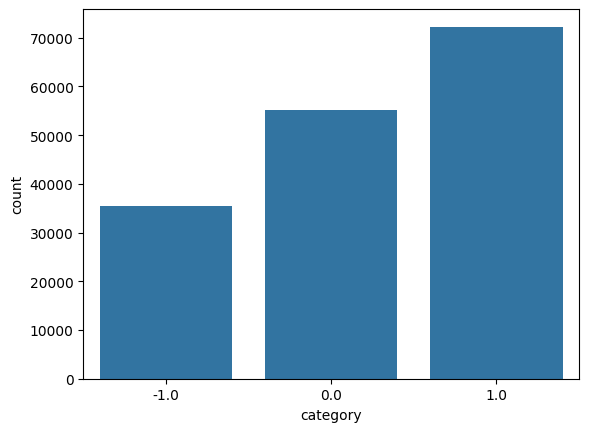

In [ ]:
sns.countplot(x='category', data=data)
plt.show()

###negative(-1), neutral(0), and positive(+1)

In [ ]:
data.dropna(how='any', inplace=True)
data.isnull().sum()

,0
clean_text,0
category,0


In [ ]:
texts = data['clean_text'].tolist()
labels = data['category'].tolist()

In [ ]:

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = text.lower()
    tokens = text.split()

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

In [ ]:
preprocessed_texts = [preprocess_text(text) for text in texts]

In [ ]:

vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(preprocessed_texts)
sequences = tokenizer.texts_to_sequences(preprocessed_texts)

In [ ]:

max_length = 80
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
num_classes = len(set(labels))
one_hot_labels = to_categorical(encoded_labels)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, one_hot_labels, test_size=0.2, random_state=42)

In [ ]:

embedding_dim = 16

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(SimpleRNN(32)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=1)

Epoch 1/10
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 587s 157ms/step - accuracy: 0.6968 - loss: 0.4251 - val_accuracy: 0.8517 - val_loss: 0.2594
Epoch 2/10
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 619s 158ms/step - accuracy: 0.8642 - loss: 0.2390 - val_accuracy: 0.8584 - val_loss: 0.2491
Epoch 3/10
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 627s 160ms/step - accuracy: 0.8747 - loss: 0.2183 - val_accuracy: 0.8602 - val_loss: 0.2474
Epoch 4/10
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 624s 160ms/step - accuracy: 0.8865 - loss: 0.1990 - val_accuracy: 0.8586 - val_loss: 0.2517
Epoch 5/10
3667/3667 ━━━━━━━━━━━━━━━━━━━━ 625s 161ms/step - accuracy: 0.8968 - loss: 0.1814 - val_accuracy: 0.8555 - val_loss: 0.2684
Epoch 6/10


KeyboardInterrupt: 

In [15]:
# Evaluate RNN model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc}")

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 59s 58ms/step - accuracy: 0.8510 - loss: 0.2726
Test Accuracy: 0.8549426198005676


In [17]:
model.save('my_model.keras')